In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv("E:\\NCKH\\NCKHNew\\labeled_data_final.csv", header = 0)
df.head(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17160\3303065738.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:\\NCKH\\NCKHNew\\labeled_data_final.csv", header = 0)


,index,reviewer_name,reviewer_country,rental_date,comments,language,sentiment
0,0,Igor,Kraków- Ba Lan,02/12/2023 00:00,best support ever witnessed answer fast kind s...,en,positive
1,1,Kevin,Cannes- Pháp,04/12/2023 00:00,everything ok,en,positive
2,2,Walid,Cannes- Pháp,09/12/2023 00:00,great accommodation games owner responded quickly,en,positive
3,3,Maxence,Vương quốc Anh,11/12/2023 00:00,thanks nigel tra friendly stay ho chi minh cit...,en,positive
4,4,Lisa,Ai/len,10/12/2023 00:00,nigel others dedicated responded quickly stay ...,en,positive


In [102]:
df = df.drop(['index','reviewer_name','reviewer_country', 'language'], axis = 1)
df

,rental_date,comments,sentiment
0,02/12/2023 00:00,best support ever witnessed answer fast kind s...,positive
1,04/12/2023 00:00,everything ok,positive
2,09/12/2023 00:00,great accommodation games owner responded quickly,positive
3,11/12/2023 00:00,thanks nigel tra friendly stay ho chi minh cit...,positive
4,10/12/2023 00:00,nigel others dedicated responded quickly stay ...,positive
...,...,...,...
470937,25/12/2023 00:00,easy travel around convenient check nice coffe...,positive
470938,21/12/2023 00:00,easy find white building cars park side road f...,positive
470939,25/12/2023 00:00,delighted visit welcoming quaint place time vi...,positive
470940,24/12/2023 00:00,nice place city center rooftop pool fitness go...,positive


In [103]:
count = df.groupby('sentiment').count()
print(count)

           rental_date  comments
sentiment                       
negative         14918     14918
neutral          56024     56024
positive        400000    400000


# Visualize

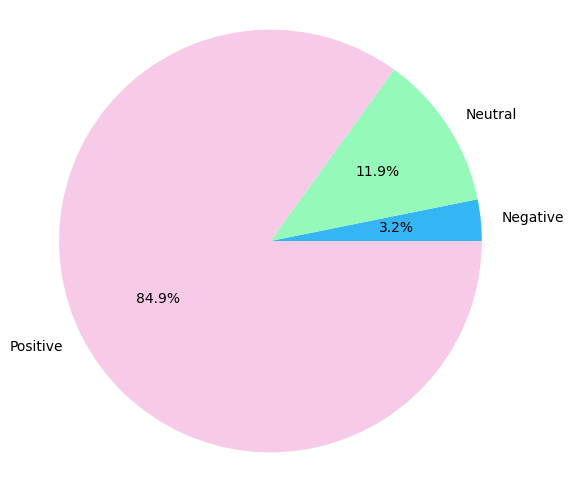

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo DataFrame mẫu
data = {'sentiment': ['Negative', 'Neutral', 'Positive'],
        'comments': [14918, 56024, 400000]}
df1 = pd.DataFrame(data)

# Trích xuất dữ liệu từ DataFrame
sizes = df1['comments']
labels = df1['sentiment']
colors = ['#34b6f5', '#95fab9', '#f7cae7']
# Vẽ biểu đồ hình bánh
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')

# Hiển thị biểu đồ
plt.show()


In [108]:
date = df.groupby('rental_date').count()
date.head()
df['rental_date'] = pd.to_datetime(df['rental_date'], format='%d/%m/%Y %H:%M')

# Extract year from 'rental_date' and count occurrences of each year
year_counts = df['rental_date'].dt.year.value_counts()
print(year_counts)
df_new = pd.DataFrame(year_counts)
df_new = df_new.reset_index()
df_new.columns = ['rental_date', 'count']
df_new

rental_date
2023    109980
2019     90630
2022     88506
2020     60012
2018     41485
2017     28119
2021     22126
2016     17674
2015      8309
2014      2760
2013      1021
2012       296
2011        24
Name: count, dtype: int64


,rental_date,count
0,2023,109980
1,2019,90630
2,2022,88506
3,2020,60012
4,2018,41485
5,2017,28119
6,2021,22126
7,2016,17674
8,2015,8309
9,2014,2760


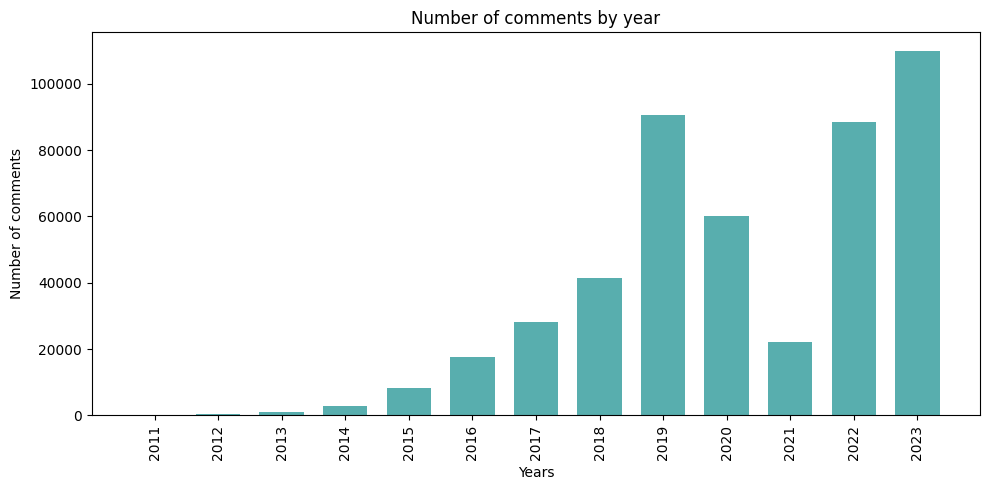

In [113]:
# creating the dataset
courses = list(df_new['rental_date'])
values = list(df_new['count'])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color='#58AEAE', width=0.7)

plt.xlabel("Years")
plt.ylabel("Number of comments")
plt.title("Number of comments by year")
plt.xticks(courses, rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
